# Carga de datos y descarga de librerias

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.discriminant_analysis import StandardScaler


df = pd.read_csv('Datos_SenecaféAlpes.csv', sep=';')


# Exploración del dataset

In [86]:
display(df.head())
print("Dimensiones:", df.shape)
display(df.dtypes)
display(df.describe())

,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
0,G006149,50836,923618.0,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
1,G007234,62764,1003767.0,409.207082,198.330199,Alargado,NaN,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,NaN,Natural
2,G007054,59965,994266.0,389.088529,197.967275,Alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,Normal,Natural
3,G006619,55035,917.6,379.346822,185.390577,Alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
4,G013353,39324,737773.0,262.520242,191.176858,Alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,Normal,Lavado


Dimensiones: (14291, 19)


ID                      object
Area                     int64
Perimetro              float64
LongitudEjeMayor       float64
LongitudEjeMenor       float64
RelacionAspecto         object
Excentricidad          float64
AreaConvexa            float64
DiametroEquivalente    float64
Medida                 float64
Solidez                float64
Redondez               float64
Compacidad             float64
FactorForma1           float64
FactorForma2           float64
FactorForma3           float64
FactorForma4           float64
DefectoVisible          object
MétodoSecado            object
dtype: object

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4
count,14291.000000,1.305400e+04,13890.000000,14291.000000,13687.000000,12868.000000,12368.000000,14291.000000,11985.000000,12228.000000,13641.000000,13172.000000,13185.000000,13813.000000,13132.000000
mean,53055.408999,7.729870e+05,319.985592,202.178613,0.749977,53575.397809,253.001741,0.749844,0.986774,0.873080,0.799242,0.006560,0.001712,0.643183,0.994292
std,29396.080372,3.266493e+05,86.378452,45.494541,0.099438,29566.387814,60.542330,0.050774,0.025947,0.063237,0.067643,0.001164,0.000601,0.100857,0.039081
min,-62716.000000,-1.012143e+06,-421.444657,-200.838672,-0.835004,-78423.000000,-448.402605,-0.798706,-0.989042,-0.896861,-0.843901,-0.007982,-0.002673,-0.683269,-0.998527
25%,36338.000000,6.768608e+05,253.319858,175.881052,0.715144,36720.000000,215.302463,0.718767,0.985597,0.832824,0.762127,0.005903,0.001151,0.581047,0.993663
50%,44660.000000,7.720345e+05,296.682345,192.437870,0.764392,45107.500000,238.579492,0.760232,0.988279,0.883353,0.800994,0.006645,0.001691,0.641648,0.996377
75%,61311.000000,9.554098e+05,376.548109,216.847844,0.810441,62109.250000,279.672481,0.786942,0.989991,0.916803,0.834405,0.007273,0.002169,0.696366,0.997889
max,254616.000000,1.921685e+06,738.860154,460.198497,0.911423,251082.000000,569.374358,0.866195,0.994378,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14291 non-null  object 
 1   Area                 14291 non-null  int64  
 2   Perimetro            13054 non-null  float64
 3   LongitudEjeMayor     13890 non-null  float64
 4   LongitudEjeMenor     14291 non-null  float64
 5   RelacionAspecto      13825 non-null  object 
 6   Excentricidad        13687 non-null  float64
 7   AreaConvexa          12868 non-null  float64
 8   DiametroEquivalente  12368 non-null  float64
 9   Medida               14291 non-null  float64
 10  Solidez              11985 non-null  float64
 11  Redondez             12228 non-null  float64
 12  Compacidad           13641 non-null  float64
 13  FactorForma1         13172 non-null  float64
 14  FactorForma2         13185 non-null  float64
 15  FactorForma3         13813 non-null 

In [88]:
print(df.isnull().sum())

ID                        0
Area                      0
Perimetro              1237
LongitudEjeMayor        401
LongitudEjeMenor          0
RelacionAspecto         466
Excentricidad           604
AreaConvexa            1423
DiametroEquivalente    1923
Medida                    0
Solidez                2306
Redondez               2063
Compacidad              650
FactorForma1           1119
FactorForma2           1106
FactorForma3            478
FactorForma4           1159
DefectoVisible         2935
MétodoSecado            587
dtype: int64


In [89]:
for c in df.columns:
    print(f"{c}: {df[c].nunique()} valores únicos")

ID: 13611 valores únicos
Area: 12011 valores únicos
Perimetro: 12213 valores únicos
LongitudEjeMayor: 13165 valores únicos
LongitudEjeMenor: 13544 valores únicos
RelacionAspecto: 4 valores únicos
Excentricidad: 12984 valores únicos
AreaConvexa: 10967 valores únicos
DiametroEquivalente: 10566 valores únicos
Medida: 13535 valores únicos
Solidez: 11367 valores únicos
Redondez: 11592 valores únicos
Compacidad: 12925 valores únicos
FactorForma1: 12460 valores únicos
FactorForma2: 12481 valores únicos
FactorForma3: 13094 valores únicos
FactorForma4: 12438 valores únicos
DefectoVisible: 2 valores únicos
MétodoSecado: 6 valores únicos


In [90]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns
print("Columnas numéricas:", numericas.tolist())
categoricas = df.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categoricas.tolist())

Columnas numéricas: ['Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor', 'Excentricidad', 'AreaConvexa', 'DiametroEquivalente', 'Medida', 'Solidez', 'Redondez', 'Compacidad', 'FactorForma1', 'FactorForma2', 'FactorForma3', 'FactorForma4']
Columnas categóricas: ['ID', 'RelacionAspecto', 'DefectoVisible', 'MétodoSecado']


In [91]:
categoricas = categoricas.drop('ID')
print("Columnas categóricas (sin ID):", categoricas.tolist())

Columnas categóricas (sin ID): ['RelacionAspecto', 'DefectoVisible', 'MétodoSecado']


In [92]:
df.drop(columns=['ID'], inplace=True)

## Observar el comportamiento del dataset eliminando todos los nulos

In [93]:
dfEliminando = df.copy()

In [94]:
dfEliminando = dfEliminando.dropna()
dfEliminando.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3603 entries, 2 to 14287
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 3603 non-null   int64  
 1   Perimetro            3603 non-null   float64
 2   LongitudEjeMayor     3603 non-null   float64
 3   LongitudEjeMenor     3603 non-null   float64
 4   RelacionAspecto      3603 non-null   object 
 5   Excentricidad        3603 non-null   float64
 6   AreaConvexa          3603 non-null   float64
 7   DiametroEquivalente  3603 non-null   float64
 8   Medida               3603 non-null   float64
 9   Solidez              3603 non-null   float64
 10  Redondez             3603 non-null   float64
 11  Compacidad           3603 non-null   float64
 12  FactorForma1         3603 non-null   float64
 13  FactorForma2         3603 non-null   float64
 14  FactorForma3         3603 non-null   float64
 15  FactorForma4         3603 non-null   float

In [95]:
print(dfEliminando.isnull().sum())

Area                   0
Perimetro              0
LongitudEjeMayor       0
LongitudEjeMenor       0
RelacionAspecto        0
Excentricidad          0
AreaConvexa            0
DiametroEquivalente    0
Medida                 0
Solidez                0
Redondez               0
Compacidad             0
FactorForma1           0
FactorForma2           0
FactorForma3           0
FactorForma4           0
DefectoVisible         0
MétodoSecado           0
dtype: int64


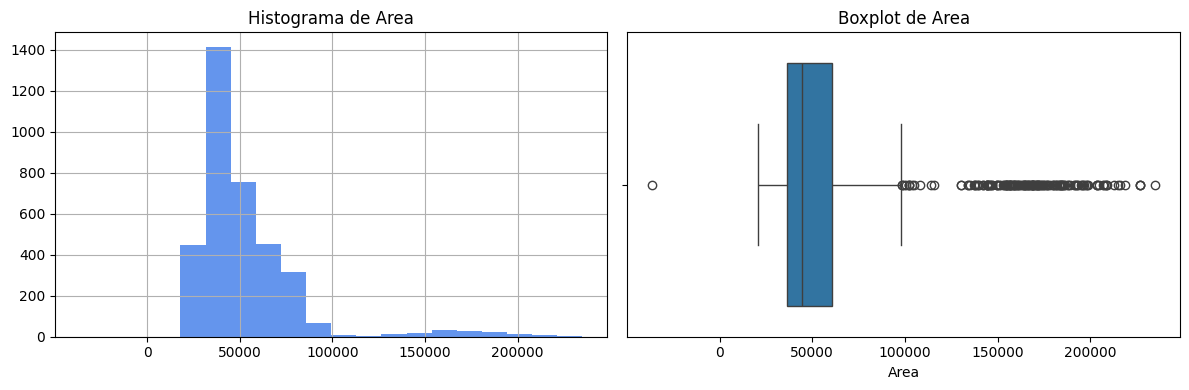

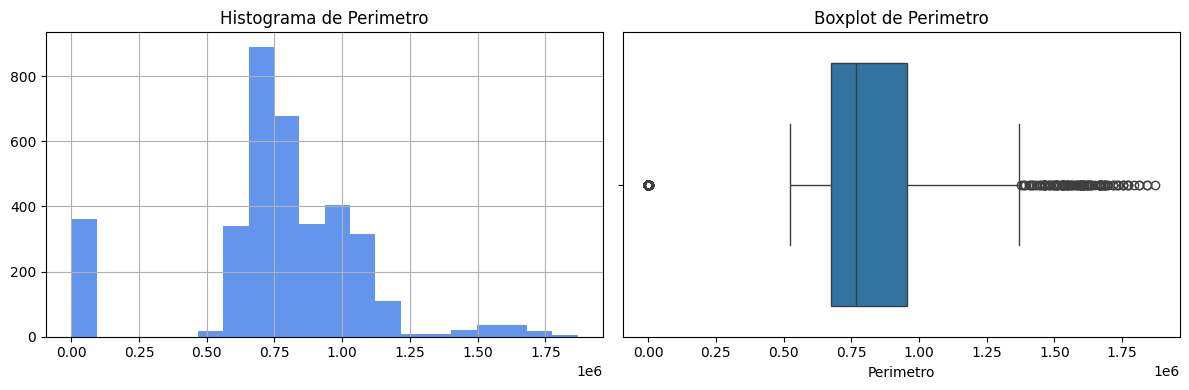

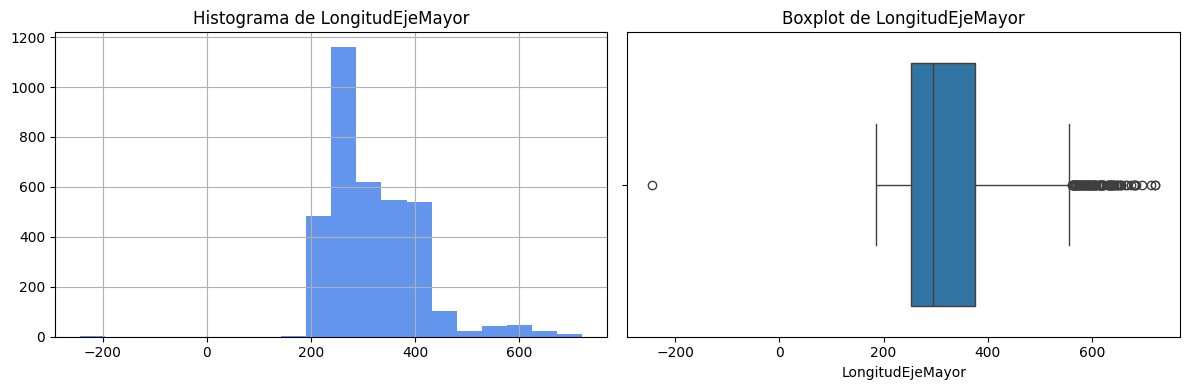

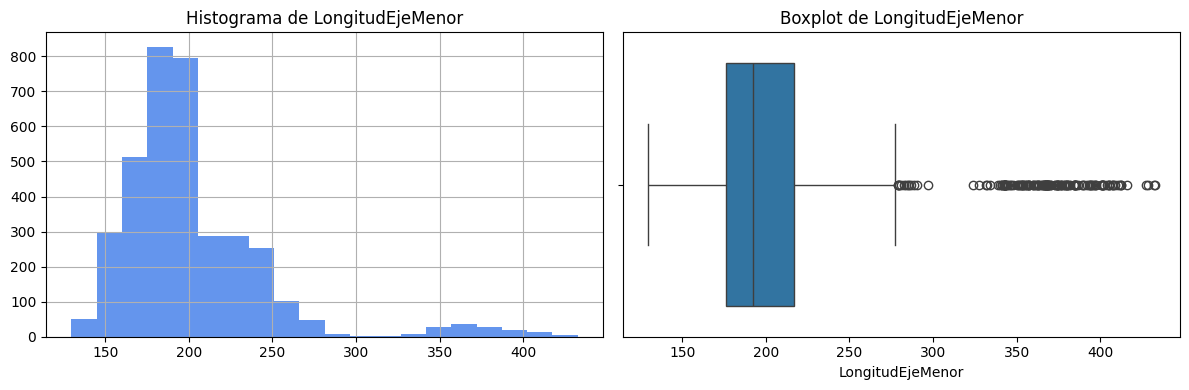

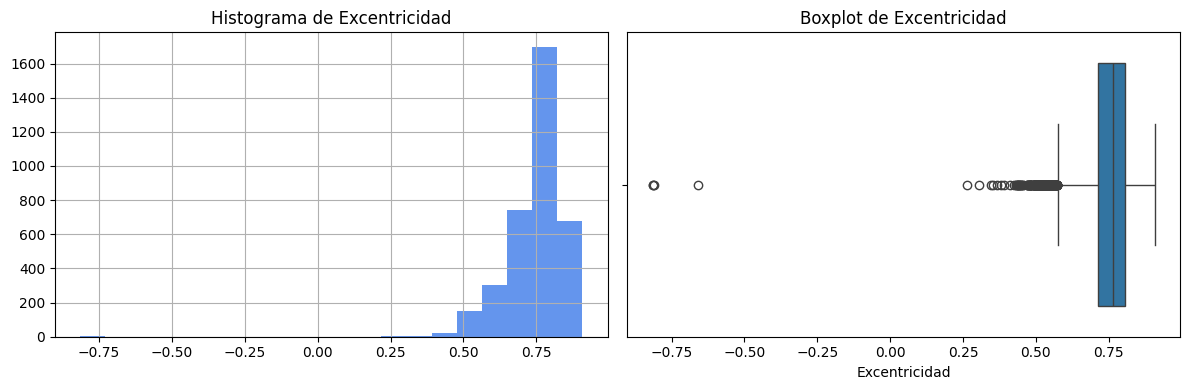

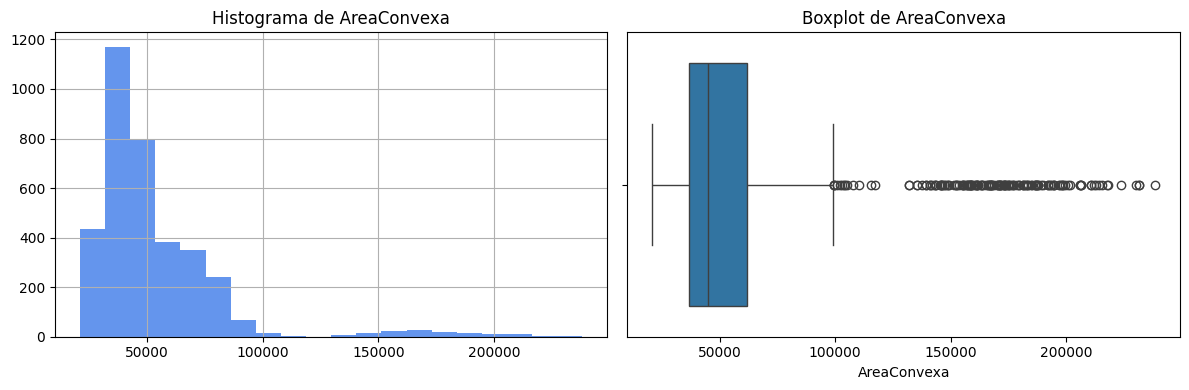

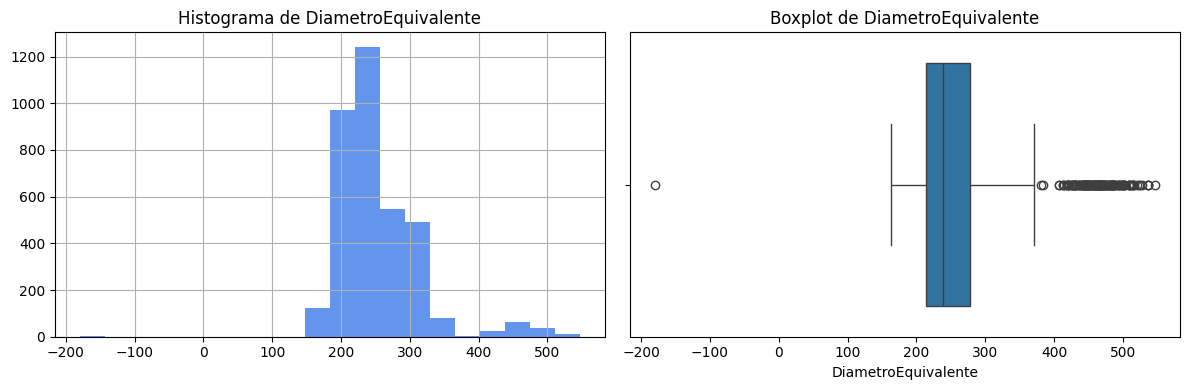

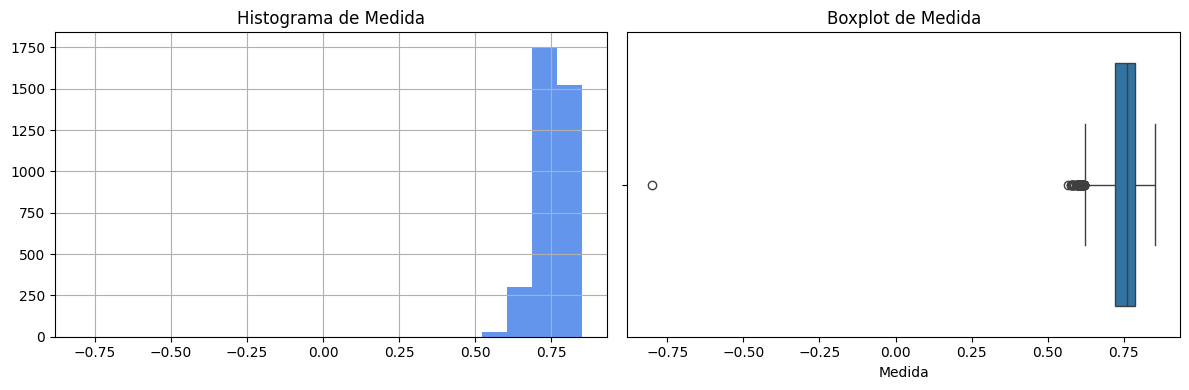

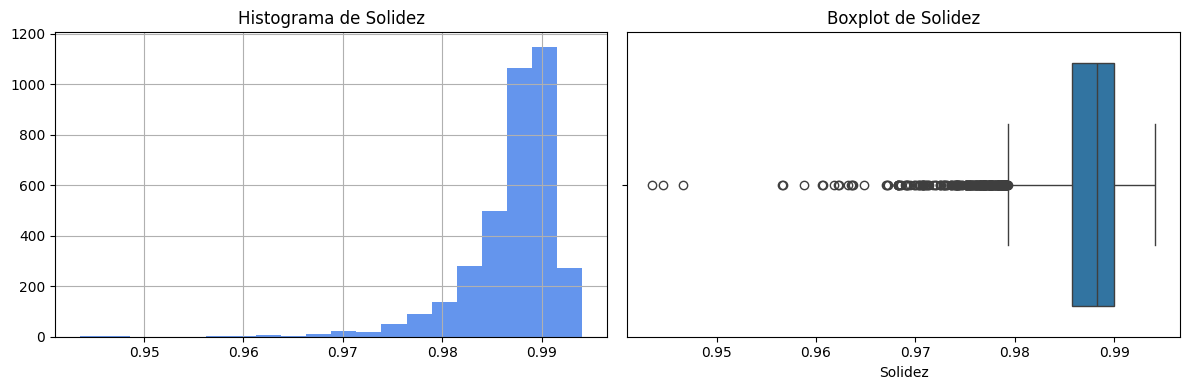

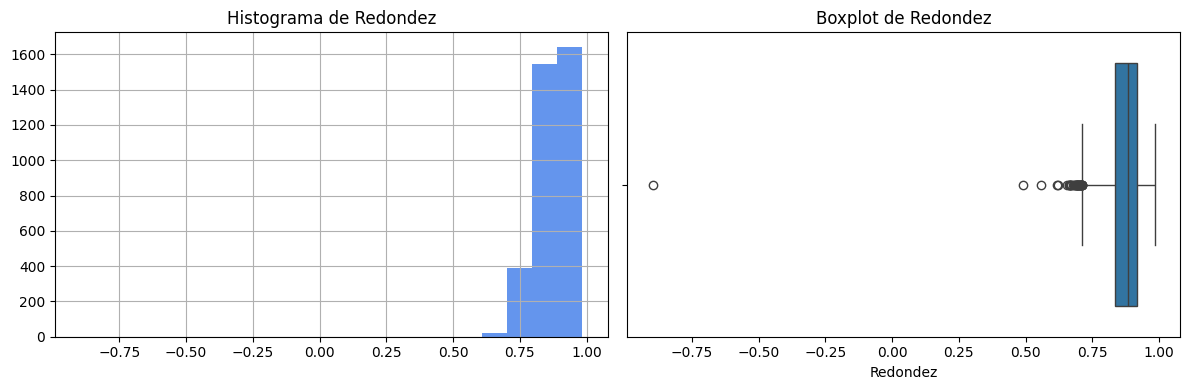

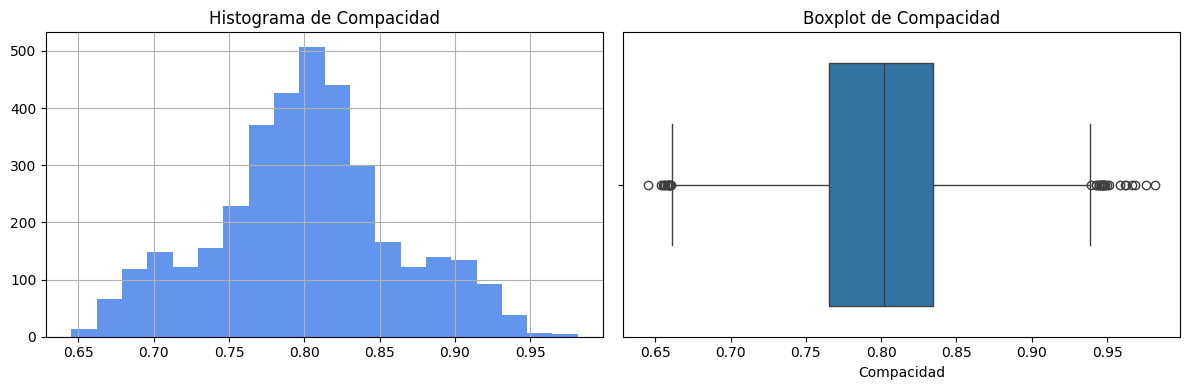

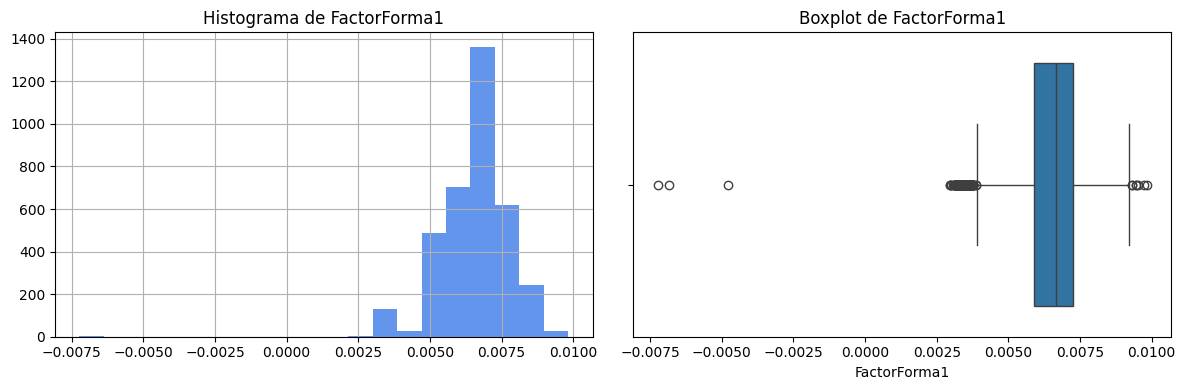

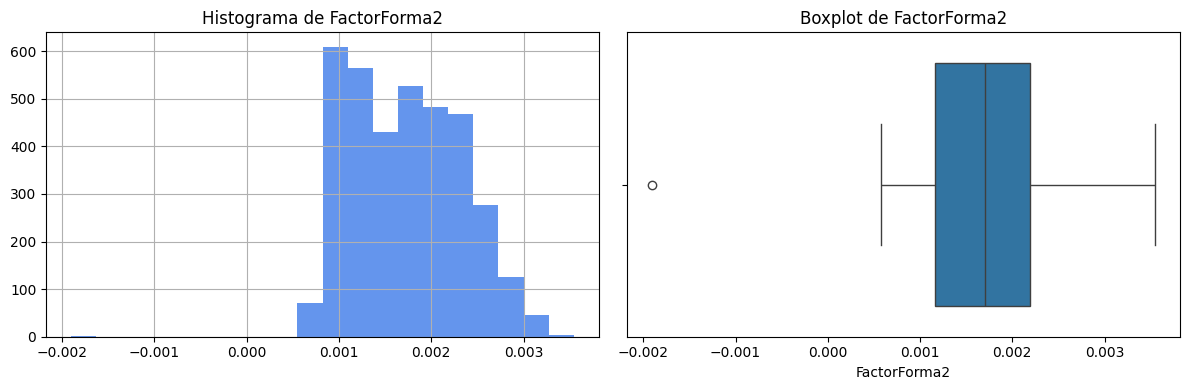

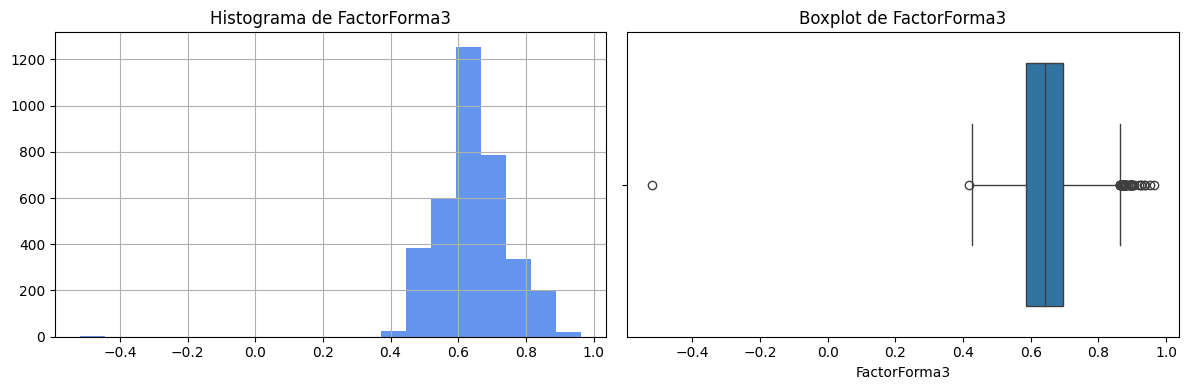

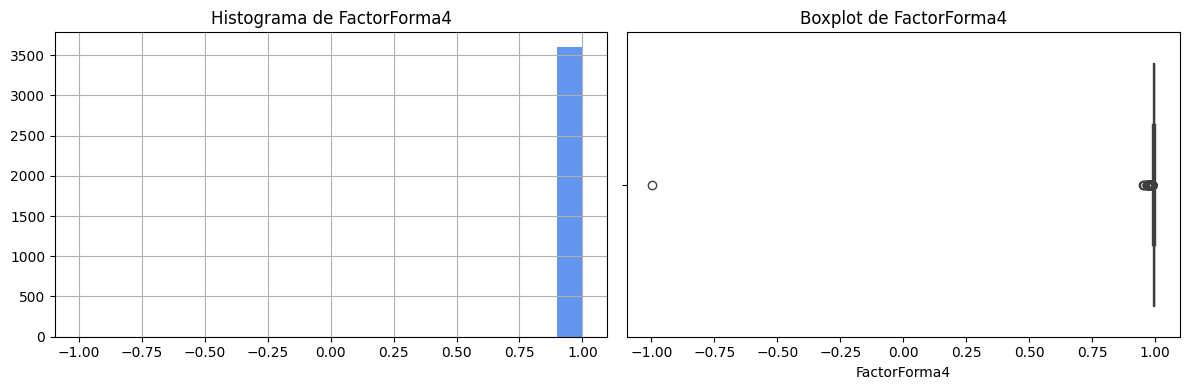

In [96]:
for col in numericas:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    dfEliminando[col].dropna().hist(ax=axes[0], bins=20, color='cornflowerblue')
    axes[0].set_title(f"Histograma de {col}")
    sns.boxplot(data=dfEliminando, x=col, ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")
    plt.tight_layout()
    plt.show()
    

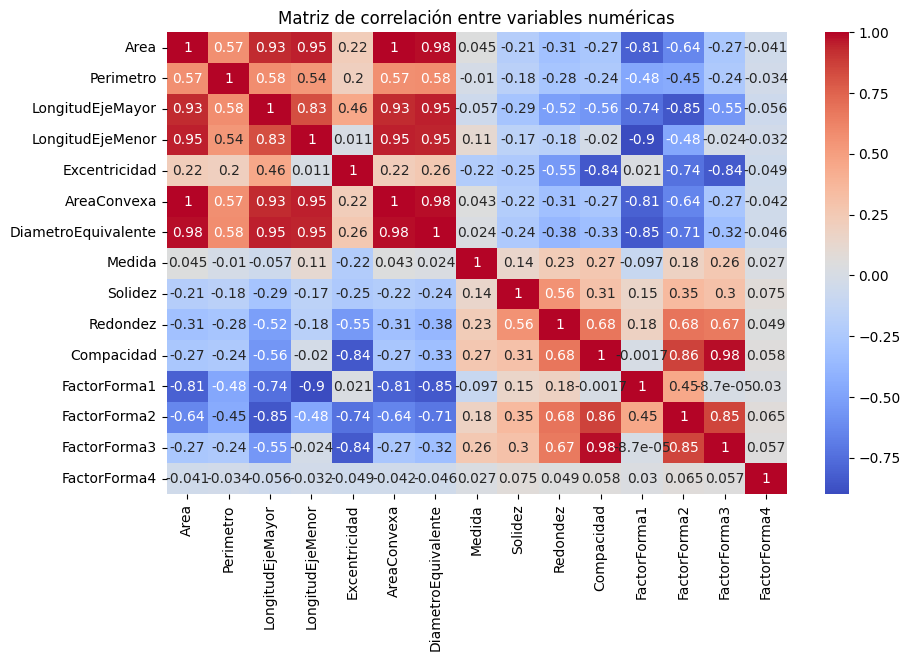

In [97]:

corr = dfEliminando[numericas].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

### Muchos datos eliminados, perdida de información importante par el modelo

## Observar el comportamiento del dataset realizando imputación de datos

In [98]:
dfPlots = df.copy()

In [99]:
for c in numericas:
    if c in dfPlots.columns:
        if dfPlots[c].isnull().sum() < dfPlots.shape[0] * 0.2:
            dfPlots[c].fillna(dfPlots[c].median(), inplace=True)
print(dfPlots.isnull().sum())

Area                      0
Perimetro                 0
LongitudEjeMayor          0
LongitudEjeMenor          0
RelacionAspecto         466
Excentricidad             0
AreaConvexa               0
DiametroEquivalente       0
Medida                    0
Solidez                   0
Redondez                  0
Compacidad                0
FactorForma1              0
FactorForma2              0
FactorForma3              0
FactorForma4              0
DefectoVisible         2935
MétodoSecado            587
dtype: int64


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_44688\729992208.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfPlots[c].fillna(dfPlots[c].median(), inplace=True)
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_44688\729992208.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [100]:
noNulas = [c for c in dfPlots.columns if dfPlots[c].isnull().sum() == 0 and c in numericas]
dfPlotsNoNulo = dfPlots[noNulas]
print(dfPlotsNoNulo.head())

    Area  Perimetro  LongitudEjeMayor  ...  FactorForma2  FactorForma3  FactorForma4
0  50836   923618.0        358.515147  ...      0.001103      0.503578      0.995321
1  62764  1003767.0        409.207082  ...      0.000916      0.477237      0.984666
2  59965   994266.0        389.088529  ...      0.001018      0.504326      0.991211
3  55035      917.6        379.346822  ...      0.001008      0.486941      0.996380
4  39324   737773.0        262.520242  ...      0.002174      0.726511      0.997630

[5 rows x 15 columns]


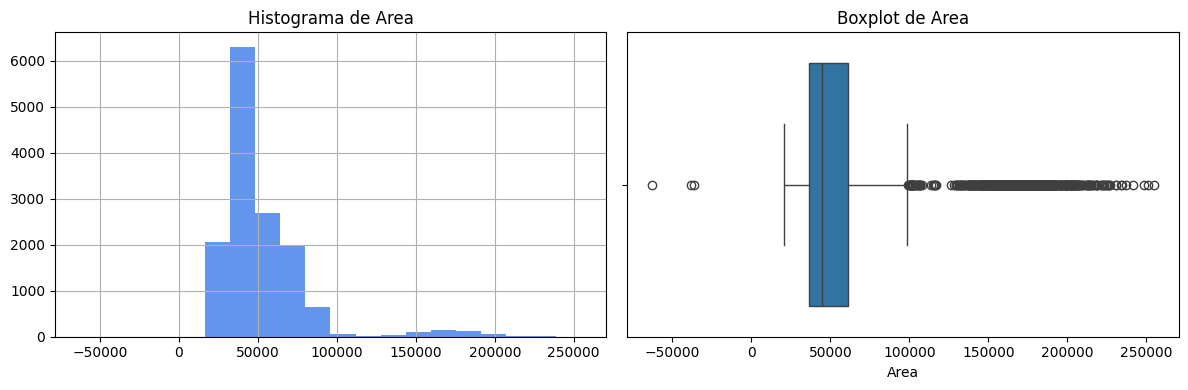

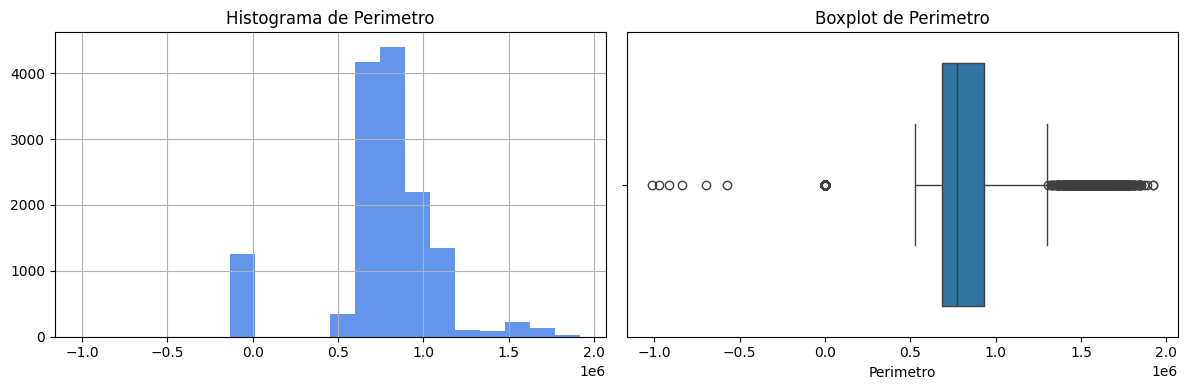

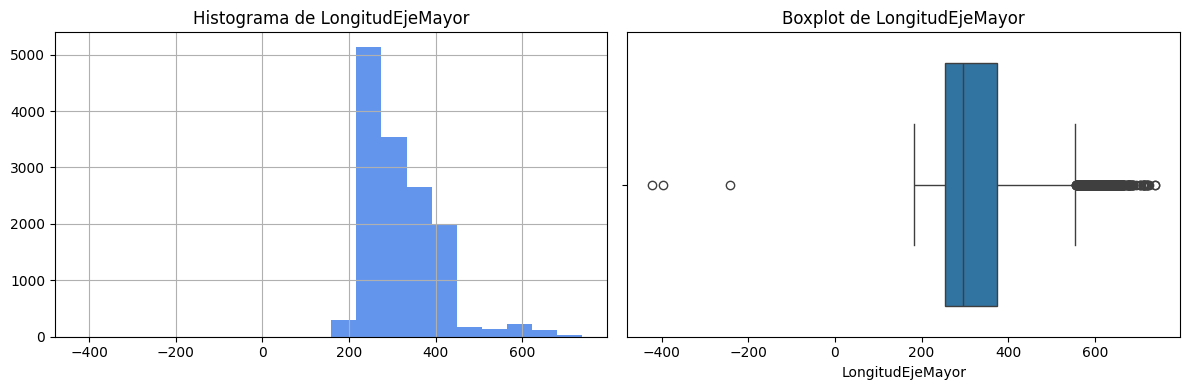

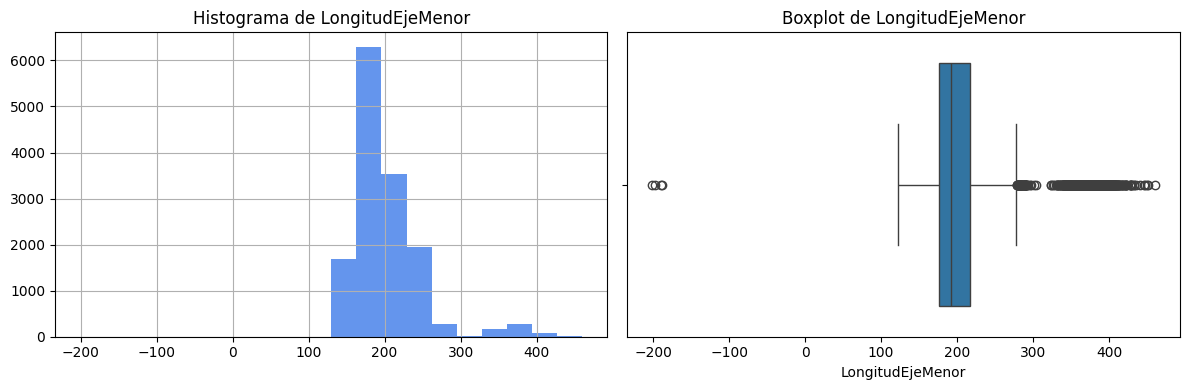

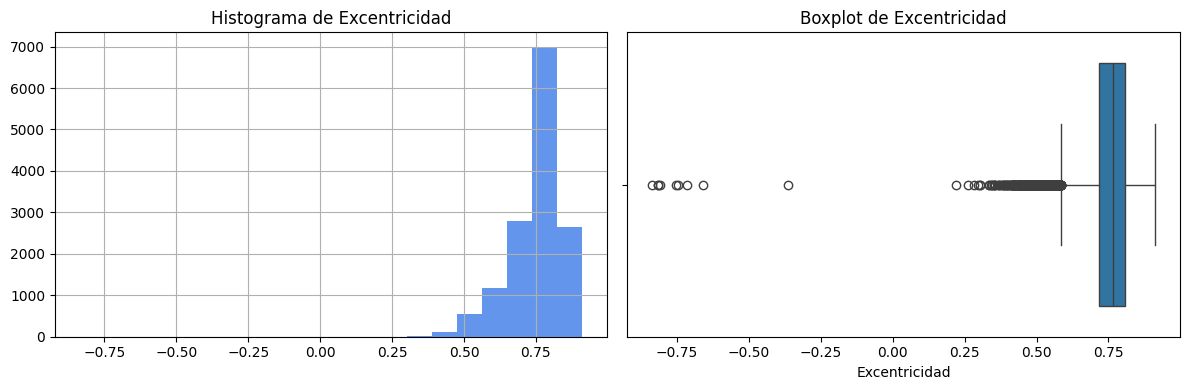

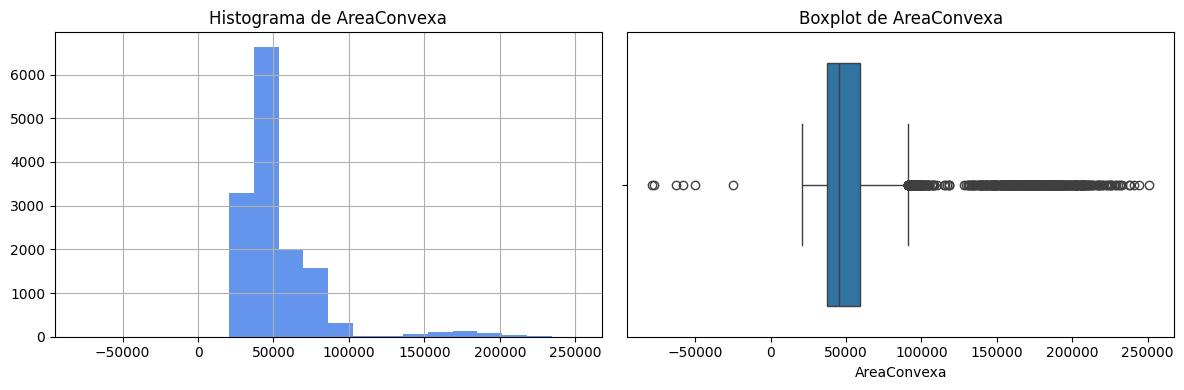

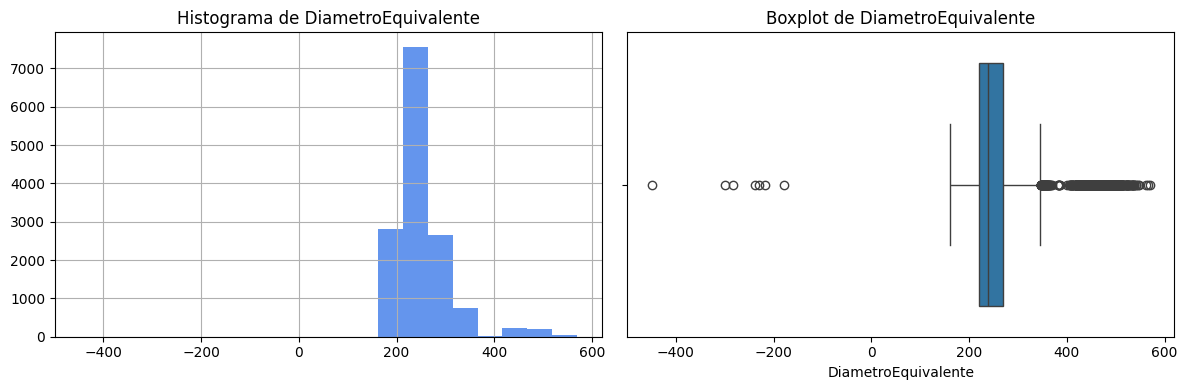

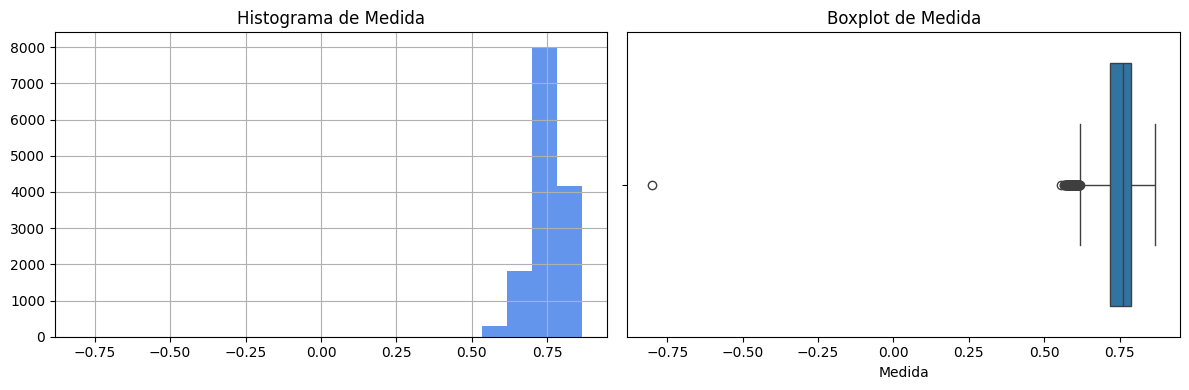

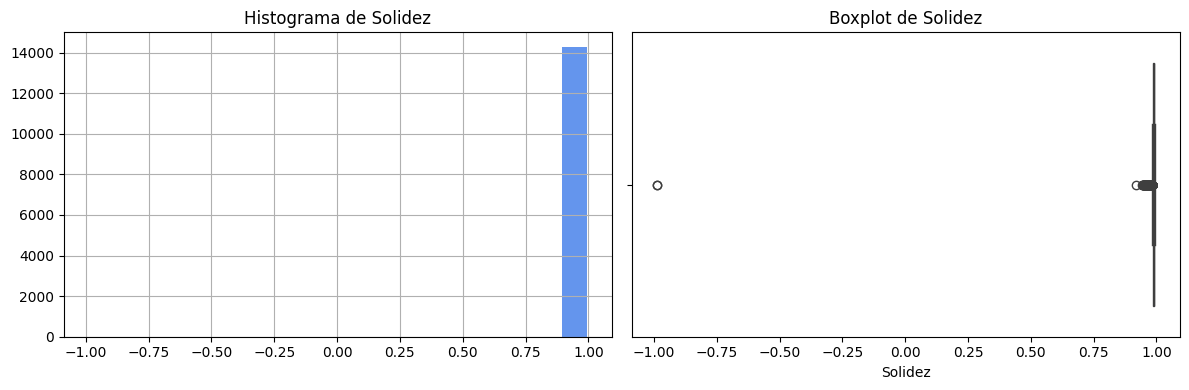

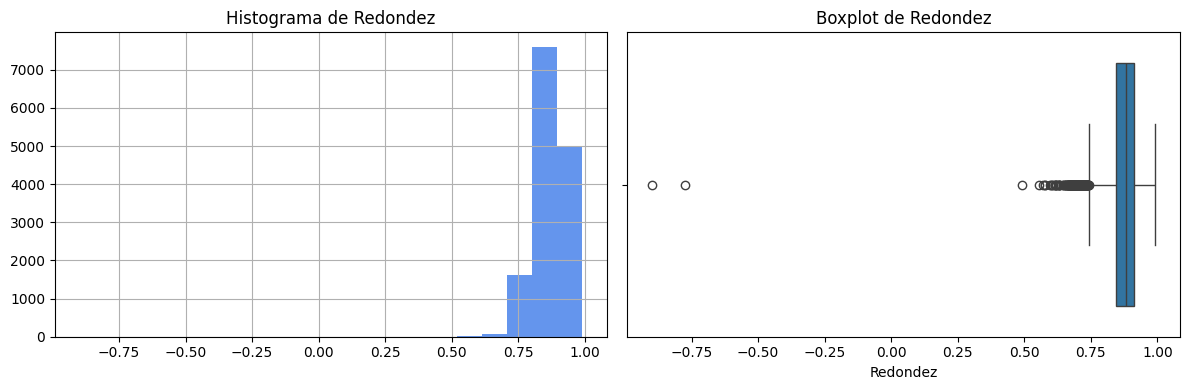

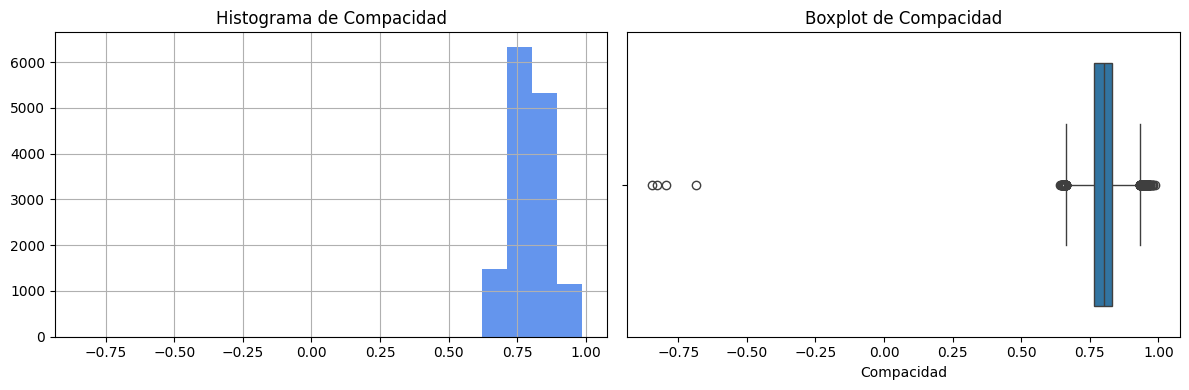

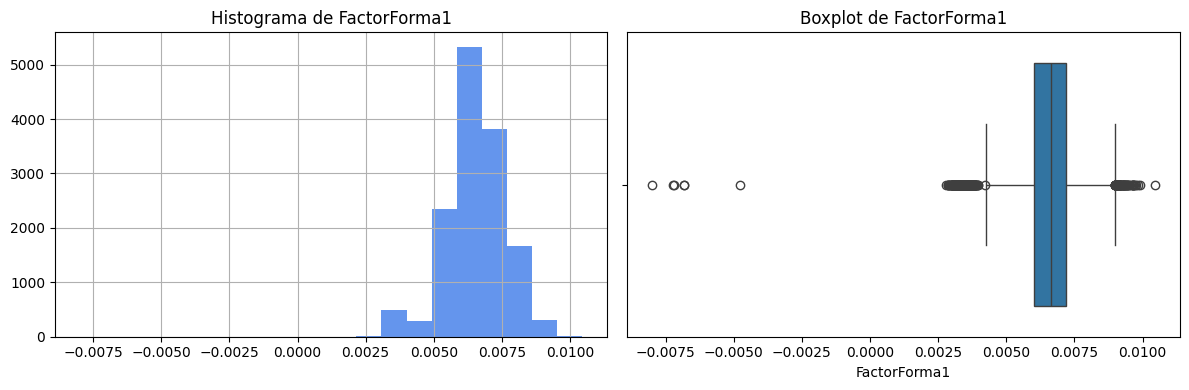

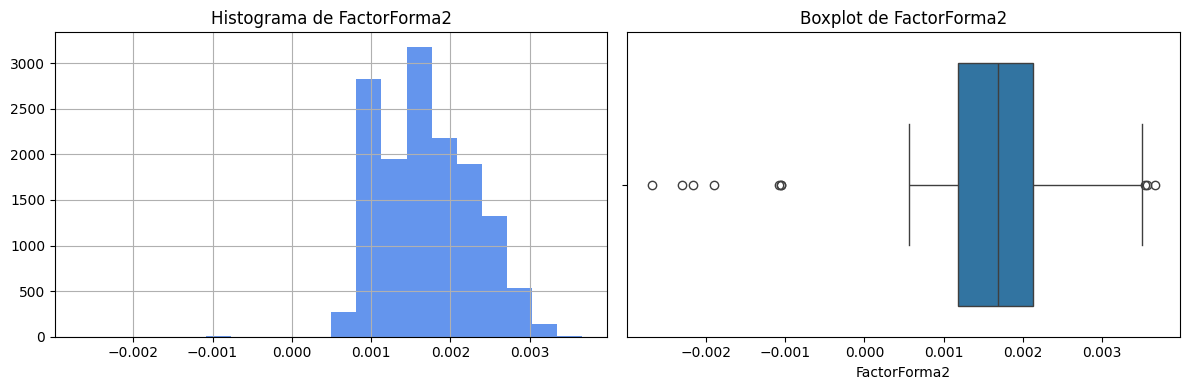

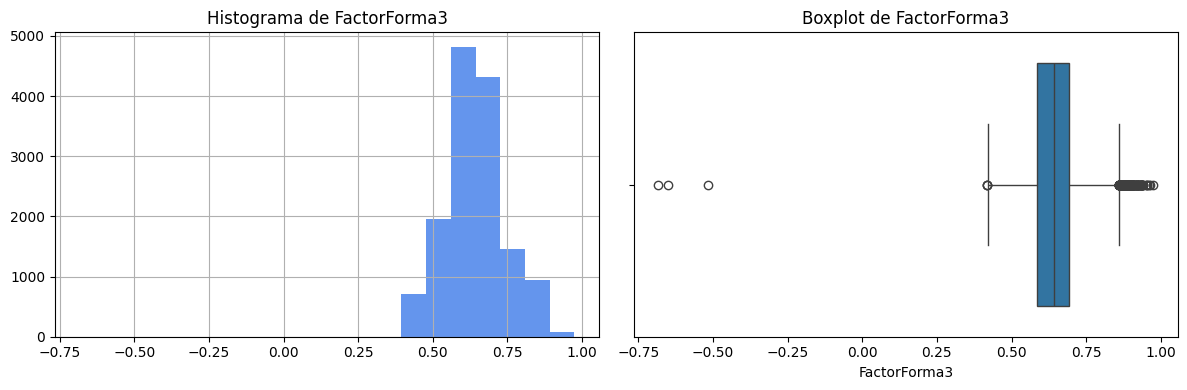

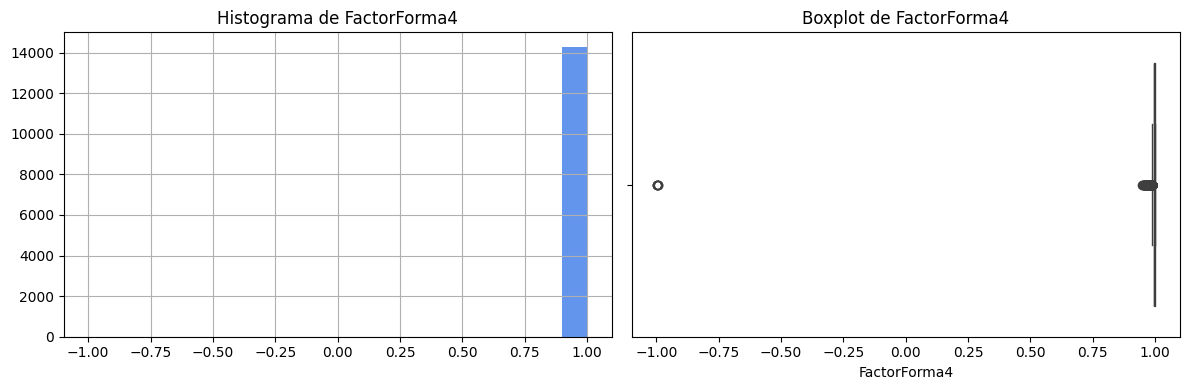

In [101]:
for col in numericas:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    dfPlotsNoNulo[col].dropna().hist(ax=axes[0], bins=20, color='cornflowerblue')
    axes[0].set_title(f"Histograma de {col}")
    sns.boxplot(data=dfPlotsNoNulo, x=col, ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")
    plt.tight_layout()
    plt.show()
    

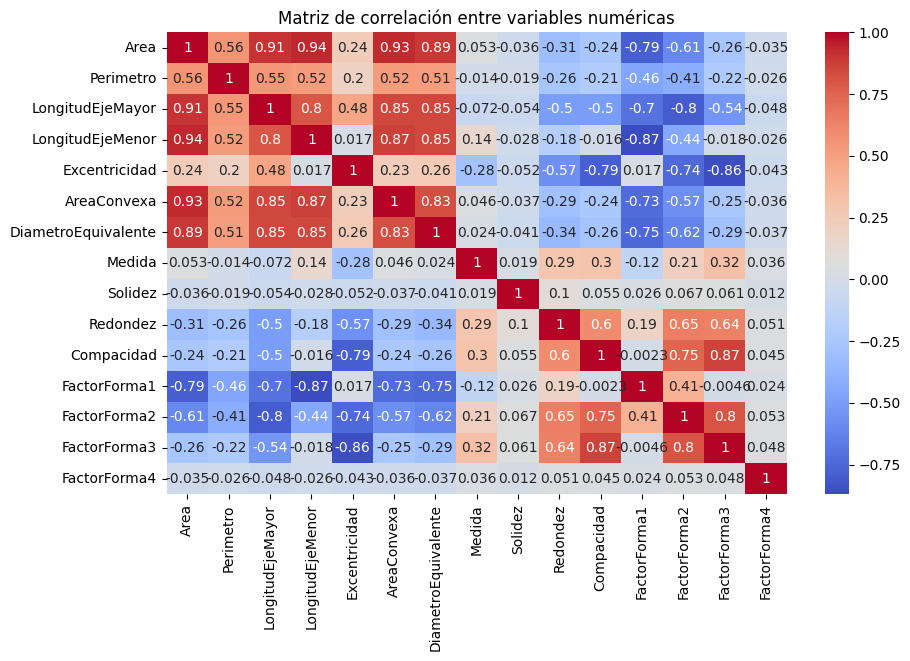

In [102]:

corr = dfPlotsNoNulo.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

# Limpieza y trata de datos general

Usaremos nuestra segunda aproximación, donde no eliminaroms los datos nulos, sino que imputaremos la mediana en estos.

In [103]:
df = dfPlots.copy()
print(df.info())
display(df.head())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 14291 non-null  int64  
 1   Perimetro            14291 non-null  float64
 2   LongitudEjeMayor     14291 non-null  float64
 3   LongitudEjeMenor     14291 non-null  float64
 4   RelacionAspecto      13825 non-null  object 
 5   Excentricidad        14291 non-null  float64
 6   AreaConvexa          14291 non-null  float64
 7   DiametroEquivalente  14291 non-null  float64
 8   Medida               14291 non-null  float64
 9   Solidez              14291 non-null  float64
 10  Redondez             14291 non-null  float64
 11  Compacidad           14291 non-null  float64
 12  FactorForma1         14291 non-null  float64
 13  FactorForma2         14291 non-null  float64
 14  FactorForma3         14291 non-null  float64
 15  FactorForma4         14291 non-null 

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
0,50836,923618.0,358.515147,181.388899,alargado,0.764392,45107.5,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
1,62764,1003767.0,409.207082,198.330199,Alargado,0.764392,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,NaN,Natural
2,59965,994266.0,389.088529,197.967275,Alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,Normal,Natural
3,55035,917.6,379.346822,185.390577,Alargado,0.872446,55591.0,238.579492,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
4,39324,737773.0,262.520242,191.176858,Alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,Normal,Lavado


Area                      0
Perimetro                 0
LongitudEjeMayor          0
LongitudEjeMenor          0
RelacionAspecto         466
Excentricidad             0
AreaConvexa               0
DiametroEquivalente       0
Medida                    0
Solidez                   0
Redondez                  0
Compacidad                0
FactorForma1              0
FactorForma2              0
FactorForma3              0
FactorForma4              0
DefectoVisible         2935
MétodoSecado            587
dtype: int64


**Observacion de columnas categoricas**

In [104]:
for c in categoricas:
    df[c] = df[c].astype('string')

In [105]:
for c in categoricas:
    print(c,df[c].unique(), len(df[c].unique()))


RelacionAspecto <StringArray>
['alargado', 'Alargado', 'Redondeado', 'redondeado', <NA>]
Length: 5, dtype: string 5
DefectoVisible <StringArray>
['Normal', <NA>, 'normal']
Length: 3, dtype: string 3
MétodoSecado <StringArray>
['Lavado', 'Natural', 'lavado', <NA>, 'natural', 'Honey', 'honey']
Length: 7, dtype: string 7


In [106]:
df["RelacionAspecto"] = df["RelacionAspecto"].replace('alargado','Alargado')
df["RelacionAspecto"] = df["RelacionAspecto"].replace('redondeado','Redondeado')
df['DefectoVisible'] = df['DefectoVisible'].replace('normal','Normal')
df['DefectoVisible'] = df['DefectoVisible'].replace('defectuoso','Defectuoso')
df['MétodoSecado'] = df['MétodoSecado'].replace('lavado','Lavado')
df['MétodoSecado'] = df['MétodoSecado'].replace('natural','Natural')
df['MétodoSecado'] = df['MétodoSecado'].replace('honey','Honey')
df['RelacionAspecto'] = df['RelacionAspecto'].fillna('Desconocido')
df['DefectoVisible'] = df['DefectoVisible'].fillna('Desconocido')
df['MétodoSecado']   = df['MétodoSecado'].fillna('Desconocido')
print(df['RelacionAspecto'].unique())
print(df['DefectoVisible'].unique())
print(df['MétodoSecado'].unique())

<StringArray>
['Alargado', 'Redondeado', 'Desconocido']
Length: 3, dtype: string
<StringArray>
['Normal', 'Desconocido']
Length: 2, dtype: string
<StringArray>
['Lavado', 'Natural', 'Desconocido', 'Honey']
Length: 4, dtype: string


In [107]:
print(df.isnull().sum())

Area                   0
Perimetro              0
LongitudEjeMayor       0
LongitudEjeMenor       0
RelacionAspecto        0
Excentricidad          0
AreaConvexa            0
DiametroEquivalente    0
Medida                 0
Solidez                0
Redondez               0
Compacidad             0
FactorForma1           0
FactorForma2           0
FactorForma3           0
FactorForma4           0
DefectoVisible         0
MétodoSecado           0
dtype: int64


Columnas eliminadas por correlación > 0.8:
['LongitudEjeMayor', 'LongitudEjeMenor', 'AreaConvexa', 'DiametroEquivalente', 'FactorForma1', 'FactorForma3']


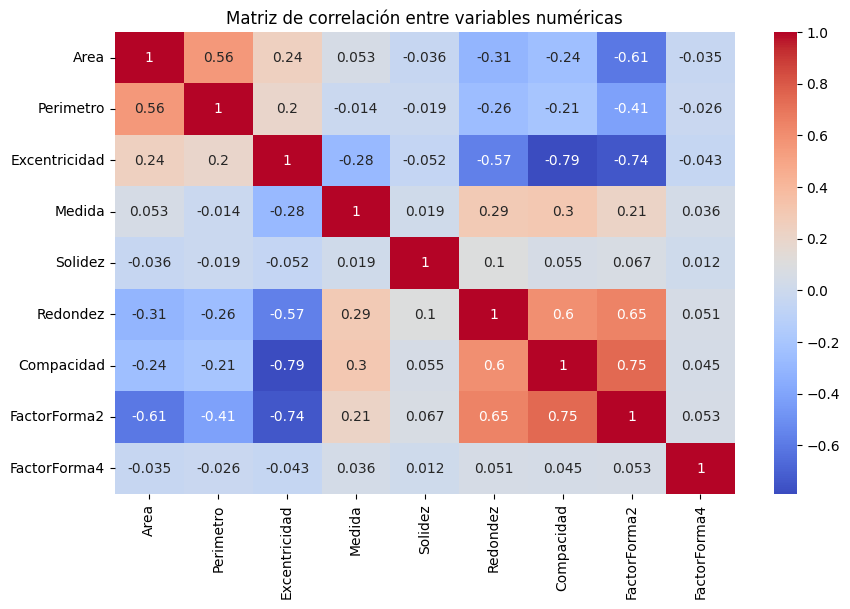

In [108]:
def eliminar_altamente_correlacionadas(df, threshold=0.9):

    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print("Columnas eliminadas por correlación > {}:".format(threshold))
    print(to_drop)
    return df.drop(columns=to_drop)

df_filtrado = eliminar_altamente_correlacionadas(df[numericas], threshold=0.8)

corr = df_filtrado.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [109]:
df = df_filtrado.join(df[categoricas])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             14291 non-null  int64  
 1   Perimetro        14291 non-null  float64
 2   Excentricidad    14291 non-null  float64
 3   Medida           14291 non-null  float64
 4   Solidez          14291 non-null  float64
 5   Redondez         14291 non-null  float64
 6   Compacidad       14291 non-null  float64
 7   FactorForma2     14291 non-null  float64
 8   FactorForma4     14291 non-null  float64
 9   RelacionAspecto  14291 non-null  string 
 10  DefectoVisible   14291 non-null  string 
 11  MétodoSecado     14291 non-null  string 
dtypes: float64(8), int64(1), string(3)
memory usage: 1.3 MB
None


# **Transformaciones necesarias para el modelo de DBScan**
Para hacer el uso del modelo de DBScan necesitamos primeramente hacer algunos cambios con las columnas que ya tenemos por el modelo, en este caso vamos a hacer que las columnas categoricas queden de manera númerica, usando un One Hot Encoding (OHE) con el fin de poder categorizar bien los datos que vamos a usar, pero antes vamos a estandarizar las columnas numericas con el fin de tener unos datos mas dentro de un rango, vamos a usar dos tipos de estandarización, la estandar y la estandarización minmax:

In [110]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_cols = df.select_dtypes(include=['int64', 'float64']).columns 

df_db = df.copy()
df_dbstd = df.copy()
df_dbminmax = df.copy()

Scaler = StandardScaler()
df_dbstd[num_cols] = Scaler.fit_transform(df_dbstd[num_cols])


MinMax = MinMaxScaler()
df_dbminmax[num_cols] = MinMax.fit_transform(df_dbminmax[num_cols])

Posteriormente hacemos el OHE con el fin de dividir las variables categoricas:

In [111]:
cat_cols = ['RelacionAspecto', 'DefectoVisible', 'MétodoSecado']

for c in cat_cols:
    df_dbstd = pd.get_dummies(df_dbstd, columns=[c], drop_first=True)
    df_dbminmax = pd.get_dummies(df_dbminmax, columns=[c], drop_first=True)
    df_db = pd.get_dummies(df_db, columns=[c], drop_first=True)


Procedemos a ver cada uno de los datos exportados dentro de ambos dataframes:

In [112]:
df_dbstd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area                         14291 non-null  float64
 1   Perimetro                    14291 non-null  float64
 2   Excentricidad                14291 non-null  float64
 3   Medida                       14291 non-null  float64
 4   Solidez                      14291 non-null  float64
 5   Redondez                     14291 non-null  float64
 6   Compacidad                   14291 non-null  float64
 7   FactorForma2                 14291 non-null  float64
 8   FactorForma4                 14291 non-null  float64
 9   RelacionAspecto_Desconocido  14291 non-null  boolean
 10  RelacionAspecto_Redondeado   14291 non-null  boolean
 11  DefectoVisible_Normal        14291 non-null  boolean
 12  MétodoSecado_Honey           14291 non-null  boolean
 13  MétodoSecado_Lav

In [113]:
df_dbminmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area                         14291 non-null  float64
 1   Perimetro                    14291 non-null  float64
 2   Excentricidad                14291 non-null  float64
 3   Medida                       14291 non-null  float64
 4   Solidez                      14291 non-null  float64
 5   Redondez                     14291 non-null  float64
 6   Compacidad                   14291 non-null  float64
 7   FactorForma2                 14291 non-null  float64
 8   FactorForma4                 14291 non-null  float64
 9   RelacionAspecto_Desconocido  14291 non-null  boolean
 10  RelacionAspecto_Redondeado   14291 non-null  boolean
 11  DefectoVisible_Normal        14291 non-null  boolean
 12  MétodoSecado_Honey           14291 non-null  boolean
 13  MétodoSecado_Lav

Ahora con los datos preparados, implementamos el modelo de DBScan con el fin de buscar los mejores parametros para este

Probando eps=0.5, min_samples=3
Probando eps=0.5, min_samples=5
Probando eps=0.5, min_samples=10
Probando eps=0.5, min_samples=15
Probando eps=1.0, min_samples=3
Probando eps=1.0, min_samples=5
Probando eps=1.0, min_samples=10
Probando eps=1.0, min_samples=15
Probando eps=1.5, min_samples=3
Probando eps=1.5, min_samples=5
Probando eps=1.5, min_samples=10
Probando eps=1.5, min_samples=15
Probando eps=2.0, min_samples=3
Probando eps=2.0, min_samples=5
Probando eps=2.0, min_samples=10
Probando eps=2.0, min_samples=15
Probando eps=2.5, min_samples=3
Probando eps=2.5, min_samples=5
Probando eps=2.5, min_samples=10
Probando eps=2.5, min_samples=15
Probando eps=3.0, min_samples=3
Probando eps=3.0, min_samples=5
Probando eps=3.0, min_samples=10
Probando eps=3.0, min_samples=15
Resultados DBSCAN:
    eps  min_samples  n_clusters  noise_ratio  silhouette
0   0.5            3           3     0.999370   -0.167308
1   0.5            5           0     1.000000         NaN
2   0.5           10       

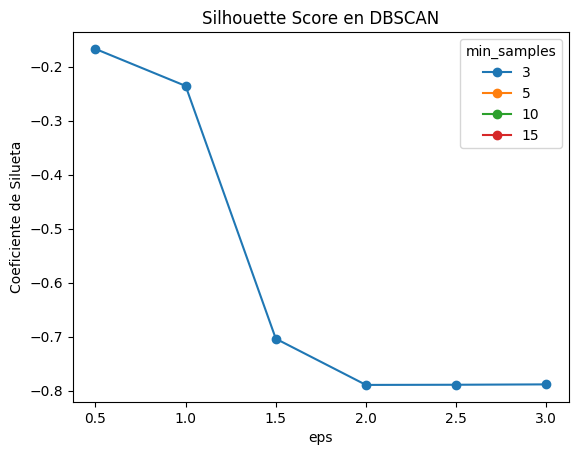

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

X = df_db.values
eps_values = np.arange(0.5, 3.5, 0.5)
min_samples_values = [3, 5, 10, 15]

rows = []

for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"Probando eps={eps}, min_samples={min_samples}")
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = (labels == -1).mean()
        sil = np.nan
        if n_clusters > 1:
            sil = silhouette_score(X, labels)
        rows.append({
        "eps": eps,
        "min_samples": min_samples,
        "n_clusters": n_clusters,
        "noise_ratio": noise_ratio,
        "silhouette": sil,
        })


results_df = pd.DataFrame(rows)
print("Resultados DBSCAN:")
print(results_df)


pivot_eps = results_df.pivot(index="eps", columns="min_samples", values="silhouette")
pivot_eps.plot(marker='o')
plt.title("Silhouette Score en DBSCAN")
plt.ylabel("Coeficiente de Silueta")
plt.xlabel("eps")
plt.show()

Despues procedemos a probarlo con los datos estandarizados con el StandardScaler:

Probando eps=0.5, min_samples=3
Probando eps=0.5, min_samples=5
Probando eps=0.5, min_samples=10
Probando eps=0.5, min_samples=15
Probando eps=1.0, min_samples=3
Probando eps=1.0, min_samples=5
Probando eps=1.0, min_samples=10
Probando eps=1.0, min_samples=15
Probando eps=1.5, min_samples=3
Probando eps=1.5, min_samples=5
Probando eps=1.5, min_samples=10
Probando eps=1.5, min_samples=15
Probando eps=2.0, min_samples=3
Probando eps=2.0, min_samples=5
Probando eps=2.0, min_samples=10
Probando eps=2.0, min_samples=15
Probando eps=2.5, min_samples=3
Probando eps=2.5, min_samples=5
Probando eps=2.5, min_samples=10
Probando eps=2.5, min_samples=15
Probando eps=3.0, min_samples=3
Probando eps=3.0, min_samples=5
Probando eps=3.0, min_samples=10
Probando eps=3.0, min_samples=15
Resultados DBSCAN:
    eps  min_samples  n_clusters  noise_ratio  silhouette
0   0.5            3         200     0.181093   -0.339923
1   0.5            5          76     0.234623   -0.302604
2   0.5           10       

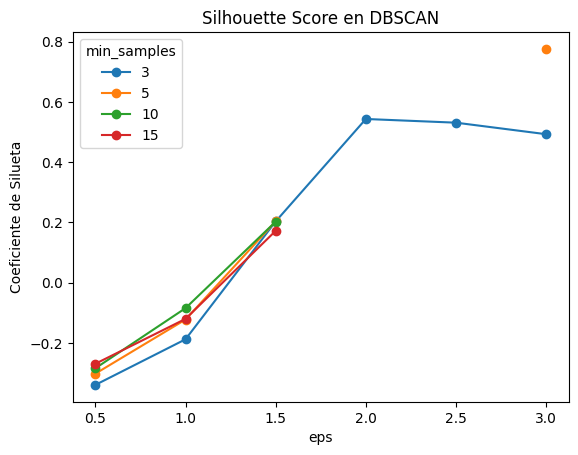

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

X = df_dbstd.values
eps_values = np.arange(0.5, 3.5, 0.5)
min_samples_values = [3, 5, 10, 15]

rows = []

for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"Probando eps={eps}, min_samples={min_samples}")
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = (labels == -1).mean()
        sil = np.nan
        if n_clusters > 1:
            sil = silhouette_score(X, labels)
        rows.append({
        "eps": eps,
        "min_samples": min_samples,
        "n_clusters": n_clusters,
        "noise_ratio": noise_ratio,
        "silhouette": sil,
        })


results_df = pd.DataFrame(rows)
print("Resultados DBSCAN:")
print(results_df)


pivot_eps = results_df.pivot(index="eps", columns="min_samples", values="silhouette")
pivot_eps.plot(marker='o')
plt.title("Silhouette Score en DBSCAN")
plt.ylabel("Coeficiente de Silueta")
plt.xlabel("eps")
plt.show()

In [116]:
best_row = results_df.loc[results_df['silhouette'].idxmax()]
print("\n>>> Mejor combinación encontrada:")
print(best_row)


>>> Mejor combinación encontrada:
eps            3.000000
min_samples    5.000000
n_clusters     2.000000
noise_ratio    0.001609
silhouette     0.776185
Name: 21, dtype: float64


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8,5))

example_eps = float(best_row['eps'])
example_min_samples = int(best_row['min_samples'])
db_example = DBSCAN(eps=example_eps, min_samples=example_min_samples)
labels_db = db_example.fit_predict(X)


plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_db, cmap='plasma', s=30)
plt.title(f"Clusters DBSCAN con PCA (eps={example_eps}, min_samples={example_min_samples})")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")


plt.tight_layout()
plt.show()

InvalidParameterError: The 'min_samples' parameter of DBSCAN must be an int in the range [1, inf). Got 5.0 instead.

<Figure size 800x500 with 0 Axes>

In [ ]:
unique, counts = np.unique(labels_db, return_counts=True)
for cluster, count in zip(unique, counts):
    if cluster == -1:
        print(f"Ruido: {count} puntos")
    else:
        print(f"Cluster {cluster}: {count} puntos")

Cluster 0: 14291 puntos


Probando eps=0.5, min_samples=3
Probando eps=0.5, min_samples=5
Probando eps=0.5, min_samples=10
Probando eps=0.5, min_samples=15
Probando eps=1.0, min_samples=3
Probando eps=1.0, min_samples=5
Probando eps=1.0, min_samples=10
Probando eps=1.0, min_samples=15
Probando eps=1.5, min_samples=3
Probando eps=1.5, min_samples=5
Probando eps=1.5, min_samples=10
Probando eps=1.5, min_samples=15
Probando eps=2.0, min_samples=3
Probando eps=2.0, min_samples=5
Probando eps=2.0, min_samples=10
Probando eps=2.0, min_samples=15
Probando eps=2.5, min_samples=3
Probando eps=2.5, min_samples=5
Probando eps=2.5, min_samples=10
Probando eps=2.5, min_samples=15
Resultados DBSCAN:
    eps  min_samples  n_clusters  noise_ratio  silhouette
0   0.5            3          23     0.000910    0.799162
1   0.5            5          20     0.001679    0.809174
2   0.5           10          18     0.002659    0.807947
3   0.5           15          17     0.003569    0.806864
4   1.0            3          16     0.00

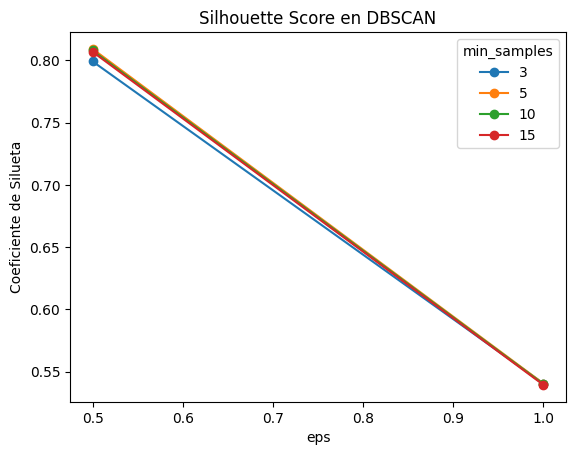

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

X = df_dbminmax.values
eps_values = np.arange(0.5, 3.0, 0.5)
min_samples_values = [3, 5, 10, 15]

rows = []

for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"Probando eps={eps}, min_samples={min_samples}")
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = (labels == -1).mean()
        sil = np.nan
        if n_clusters > 1:
            sil = silhouette_score(X, labels)
        rows.append({
        "eps": eps,
        "min_samples": min_samples,
        "n_clusters": n_clusters,
        "noise_ratio": noise_ratio,
        "silhouette": sil,
        })


results_df = pd.DataFrame(rows)
print("Resultados DBSCAN:")
print(results_df)


pivot_eps = results_df.pivot(index="eps", columns="min_samples", values="silhouette")
pivot_eps.plot(marker='o')
plt.title("Silhouette Score en DBSCAN")
plt.ylabel("Coeficiente de Silueta")
plt.xlabel("eps")
plt.show()

In [ ]:
best_row = results_df.loc[results_df['silhouette'].idxmax()]
print("\n>>> Mejor combinación encontrada:")
print(best_row)


>>> Mejor combinación encontrada:
eps             0.500000
min_samples     5.000000
n_clusters     20.000000
noise_ratio     0.001679
silhouette      0.809174
Name: 1, dtype: float64


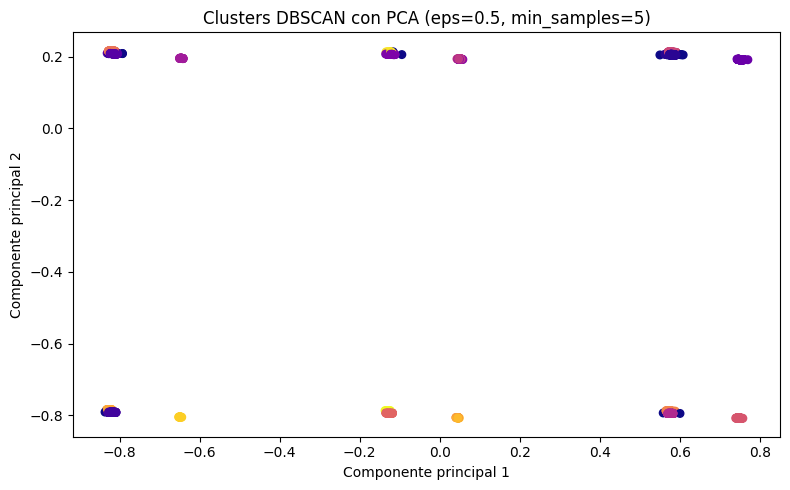

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8,5))

example_eps = best_row['eps']
example_min_samples = best_row['min_samples']
db_example = DBSCAN(eps=example_eps, min_samples=example_min_samples)
labels_db = db_example.fit_predict(X)


plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_db, cmap='plasma', s=30)
plt.title(f"Clusters DBSCAN con PCA (eps={example_eps}, min_samples={example_min_samples})")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")


plt.tight_layout()
plt.show()

In [ ]:
unique, counts = np.unique(labels_db, return_counts=True)
for cluster, count in zip(unique, counts):
    if cluster == -1:
        print(f"Ruido: {count} puntos")
    else:
        print(f"Cluster {cluster}: {count} puntos")

Ruido: 24 puntos
Cluster 0: 4810 puntos
Cluster 1: 1153 puntos
Cluster 2: 4373 puntos
Cluster 3: 1202 puntos
Cluster 4: 390 puntos
Cluster 5: 55 puntos
Cluster 6: 62 puntos
Cluster 7: 1215 puntos
Cluster 8: 63 puntos
Cluster 9: 201 puntos
Cluster 10: 330 puntos
Cluster 11: 112 puntos
Cluster 12: 165 puntos
Cluster 13: 41 puntos
Cluster 14: 13 puntos
Cluster 15: 38 puntos
Cluster 16: 9 puntos
Cluster 17: 15 puntos
Cluster 18: 15 puntos
Cluster 19: 5 puntos


# Transformaciones necesarias para el modelo de GMM (Gaussian Mixture Model)